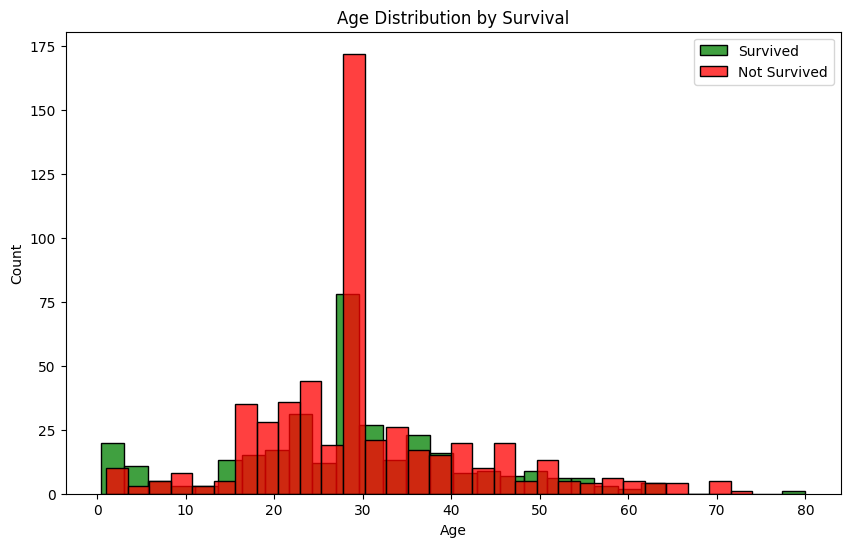

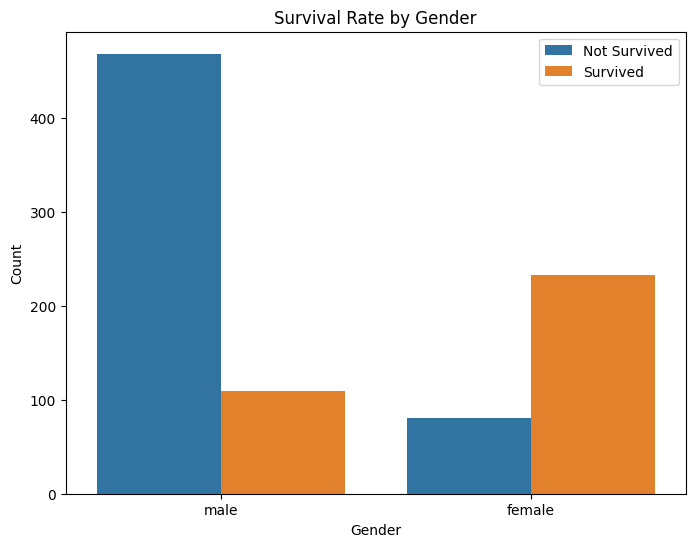

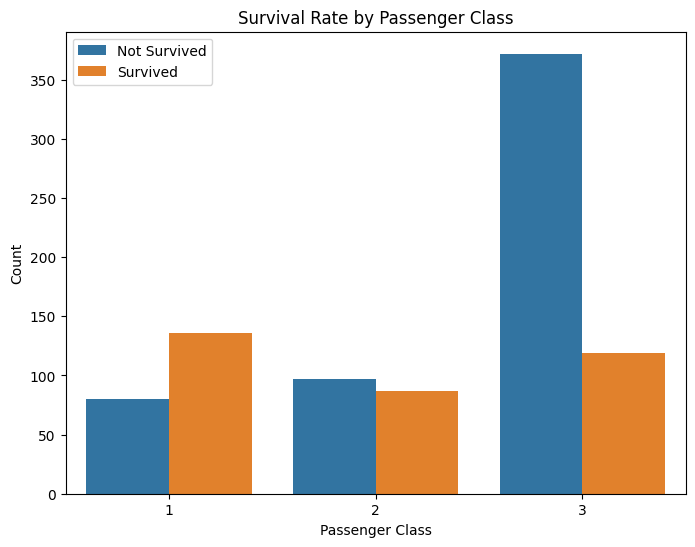

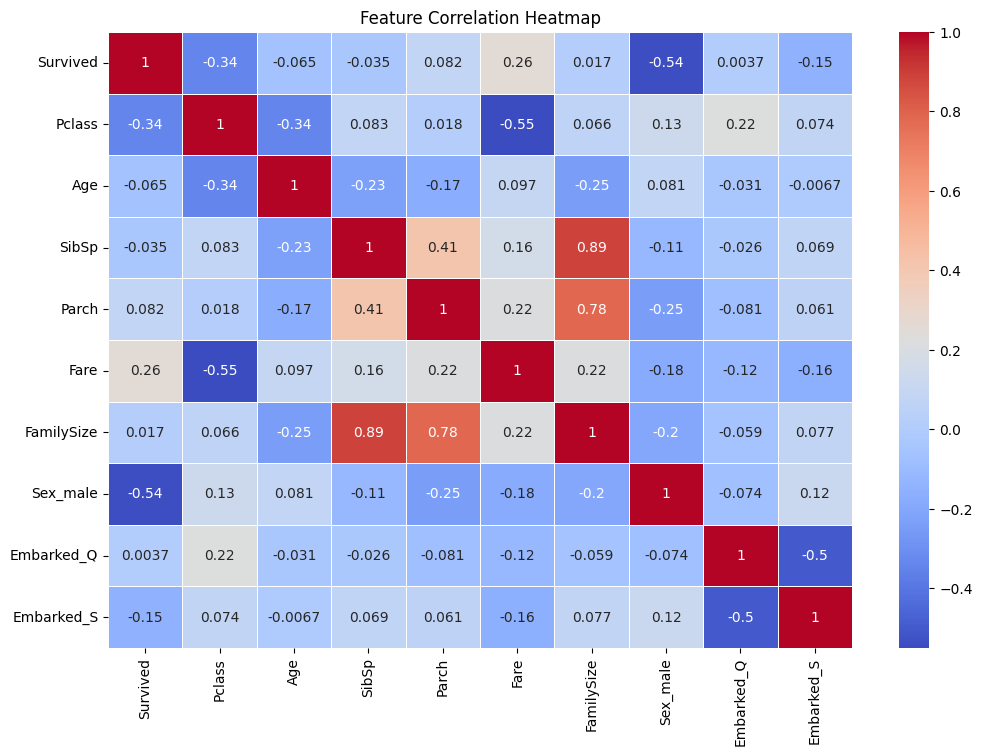

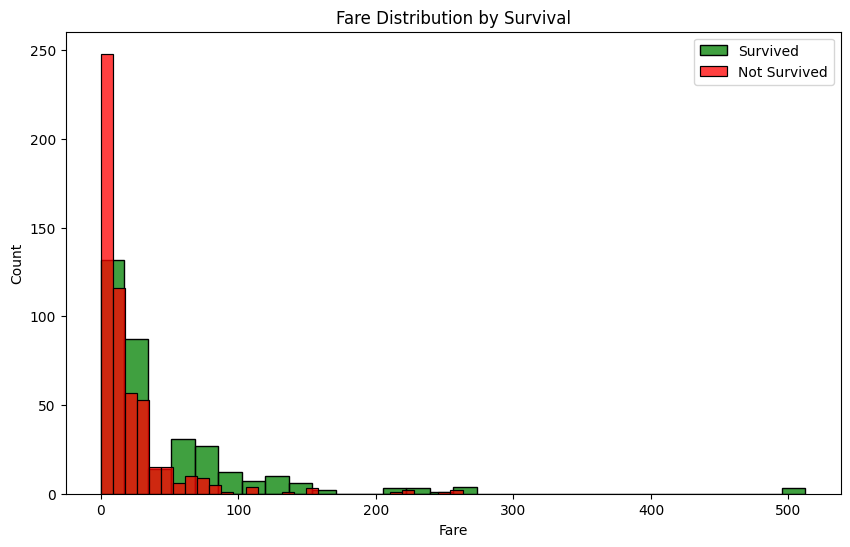

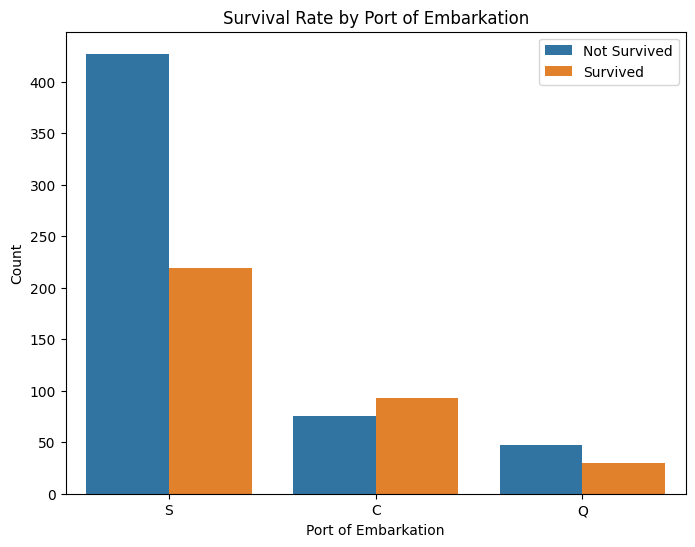

Accuracy: 0.8324022346368715
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       105
           1       0.85      0.72      0.78        74

    accuracy                           0.83       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Confusion Matrix:
 [[96  9]
 [21 53]]
Feature Importance:
 Sex_male      0.382856
Fare          0.200774
Age           0.159657
Pclass        0.118227
FamilySize    0.055656
SibSp         0.034898
Embarked_S    0.021507
Parch         0.019034
Embarked_Q    0.007391
dtype: float64


In [2]:
# Titanic Survival Analysis and Prediction

# Import libraries for data manipulation, visualization, modeling, and evaluation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load and Explore Data

# Load the Titanic dataset from a local CSV file
df = pd.read_csv('../data/titanic.csv')

# Preview the first few rows to understand the data
df.head()

# Data Preprocessing

# Impute missing values using appropriate strategies
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Drop irrelevant columns for analysis and modeling
df = df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1)

# Create a copy of the original DataFrame for visualization
df_original = df.copy()

# Feature Engineering

# Create a new 'FamilySize' feature by combining siblings/spouses and parents/children

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Encode categorical variables ('Sex' and 'Embarked') using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Exploratory Data Analysis (EDA)

# Visualize distributions and relationships to gain insights

# Age distribution by survival status
plt.figure(figsize=(10, 6))
sns.histplot(df_original[df_original['Survived'] == 1]['Age'], bins=30, kde=False, color='green', label='Survived')
sns.histplot(df_original[df_original['Survived'] == 0]['Age'], bins=30, kde=False, color='red', label='Not Survived')
plt.legend()
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Survival Rate by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df_original)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

# Survival Rate by Pclass
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df_original)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Fare Distribution by Survival
plt.figure(figsize=(10, 6))
sns.histplot(df_original[df_original['Survived'] == 1]['Fare'], bins=30, kde=False, color='green', label='Survived')
sns.histplot(df_original[df_original['Survived'] == 0]['Fare'], bins=30, kde=False, color='red', label='Not Survived')
plt.legend()
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# Embarked Distribution by Survival
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=df_original)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

# Split the data into training and testing sets
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest model with optimized hyperparameters
best_rf = RandomForestClassifier(bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)
